In [101]:
import numpy as np
from cdlib import algorithms, viz, evaluation
import networkx as nx
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
# import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [102]:
with open('../pkl/global_weekly_sorted_tensor2.pkl', 'rb') as f:
    travel_tensors_raw = pickle.load(f) 

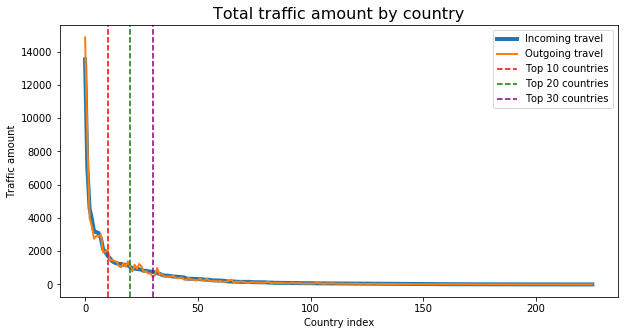

In [103]:
# How to set a cutline
plt.figure(figsize=(10,5))
plt.plot(np.sum(np.sum(travel_tensors_raw, axis=0)[:226,:226], axis=0), linewidth=4, label = "Incoming travel")
plt.plot(np.sum(np.sum(travel_tensors_raw, axis=0)[:226,:226], axis=1), alpha=1, linewidth=2, label = "Outgoing travel")
plt.axvline(x=10, linestyle='--', color='red', label = 'Top 10 countries')
plt.axvline(x=20, linestyle='--', color='green', label = 'Top 20 countries')
plt.axvline(x=30, linestyle='--', color='purple', label = 'Top 30 countries')
plt.ylabel("Traffic amount")
plt.xlabel("Country index")
plt.title("Total traffic amount by country", size=16)
plt.legend()

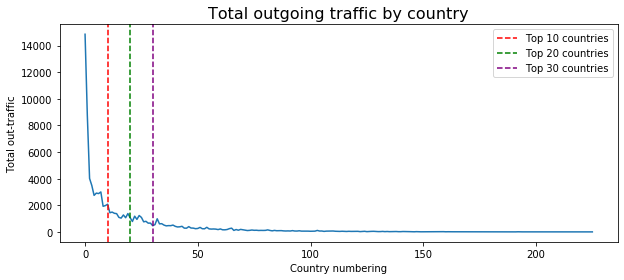

In [104]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.plot(np.sum(np.sum(travel_tensors_raw, axis=0)[:226,:226], axis=1))
plt.axvline(x=10, linestyle='--', color='red', label = 'Top 10 countries')
plt.axvline(x=20, linestyle='--', color='green', label = 'Top 20 countries')
plt.axvline(x=30, linestyle='--', color='purple', label = 'Top 30 countries')
plt.ylabel("Total out-traffic")
plt.xlabel("Country numbering")
plt.title("Total outgoing traffic by country", size=16)
plt.legend()

In [105]:
country_cutline = 30 # 69, 70 give None homogeneity
travel_tensors = travel_tensors_raw[:,0:country_cutline,0:country_cutline]

In [106]:
# # homo_list[10][[homo_list[10] is not None]]
# # print(homo_list[10][30] is None)
# not_none_list = []
# for i in range(len(homo_list[10])): 
#     if(homo_list[10][i] is not None):
#         not_none_list.append(i)
# not_none_list

In [107]:
adj_list = []
interval = 24 # 26 * 4 weeks = 2 year,
for i in range(interval):
    ajm = np.sum(travel_tensors[104 + 4*i:108 + 4*i][:,0:country_cutline,0:country_cutline], axis=0)
    adj_list.append(ajm)

In [108]:
np.array(adj_list).shape

(24, 30, 30)

In [109]:
adj_list

[array([[ 0., 30., 27.,  7.,  8., 13., 43., 30.,  6.,  1.,  8.,  3.,  4.,
          0.,  2.,  0.,  6., 10.,  2.,  3.,  3.,  0.,  8.,  0.,  1.,  0.,
          5.,  3.,  0.,  1.],
        [22.,  0., 10., 12.,  7.,  9.,  3.,  1.,  0.,  3.,  1.,  6.,  2.,
          0.,  2.,  4.,  0.,  9.,  3.,  0.,  7.,  4.,  0.,  1.,  0.,  0.,
          0.,  1.,  1.,  3.],
        [26.,  2.,  0.,  6.,  6.,  5.,  0.,  0.,  0.,  4.,  0.,  1.,  0.,
          0.,  0.,  8.,  0.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  2.],
        [ 3.,  4., 13.,  0., 12.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,
          0.,  0.,  3.,  0.,  0.,  2.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 6.,  9.,  9.,  9.,  0., 12.,  2.,  0.,  0.,  1.,  6.,  0.,  2.,
          0.,  0.,  3.,  0.,  1.,  0.,  6.,  2.,  3.,  1.,  3.,  0.,  0.,
          0.,  0.,  0.,  1.],
        [ 7.,  3.,  4.,  0.,  2.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,
          0.,  0.,  4.,  2.,  0.,  3

In [110]:
with open('../pkl/[weekly]home_adj_from20180107_sorted_2.pkl', 'rb') as f:
    home_adj_list_raw = pickle.load(f) 

In [111]:
len(home_adj_list_raw)

95

Text(0.5, 0, 'Country numbering')

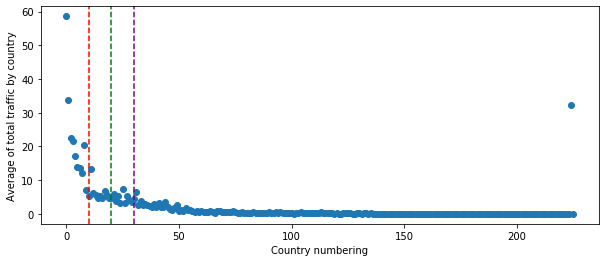

In [112]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.scatter(range(226), np.mean(np.sum(home_adj_list_raw, axis=0)[:226,:226], axis=0))
plt.axvline(x=10, linestyle='--', color='red')
plt.axvline(x=20, linestyle='--', color='green')
plt.axvline(x=30, linestyle='--', color='purple')
plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")

In [113]:
# home_adj_list = np.array(home_adj_list_raw)[:,0:country_cutline,0:country_cutline]

In [114]:
home_adj_list = []
interval = 24 # 26 * 4 weeks = 2 year,
for i in range(interval):
    arr = np.array(home_adj_list_raw[4*i:4 + 4*i])[:,0:country_cutline,0:country_cutline]
    ajm = np.sum(arr, axis=0)
    home_adj_list.append(ajm)

In [115]:
week_slices = pd.date_range('2016-01-04', periods=200+1, freq='W')

In [116]:
# travel_df = pd.read_csv('../csv/global_travel_df.csv')
# countries = travel_df['node'].unique().T

In [117]:
with open('../pkl/Twitter_label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f) 

In [118]:
# This is a dictionary of country numbers & their names
print(label_dict)

{0: 'US', 1: 'GB', 2: 'FR', 3: 'ES', 4: 'IT', 5: 'DE', 6: 'MX', 7: 'CA', 8: 'JP', 9: 'NL', 10: 'BR', 11: 'TH', 12: 'ID', 13: 'MY', 14: 'SG', 15: 'BE', 16: 'AE', 17: 'AU', 18: 'CH', 19: 'PH', 20: 'IE', 21: 'PT', 22: 'AR', 23: 'TR', 24: 'RU', 25: 'KW', 26: 'CN', 27: 'IN', 28: 'HK', 29: 'AT'}


In [119]:
# np.sum(np.array(home_adj_list)[:,:,28],axis=1)


# location = home_adj_list[-6][:,28]
# visitors = np.argwhere(location>0).T[0]
# print(visitors)
# # comb = list(itertools.combinations(visitors, 2))
# # result = 0
# # for c in comb:
# #     result += 1 / spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
# # if(len(visitors)*(len(visitors)-1) != 0):
# #     value =result/(len(visitors)*(len(visitors)-1))
# # else:
# #     value = None

In [120]:
from scipy.stats import entropy

# def socgeo_entropy(cnt_num, adjmat):
#     sum_vertical = np.sum(adjmat[:,cnt_num])+ 1e-20
#     pl =adjmat[:,cnt_num] / sum_vertical
#     return entropy(pl)
def socgeo_entropy(adjmat):
    sum_vertical = np.sum(adjmat, axis=0)+ 1e-20
    pl = adjmat / sum_vertical
    # calculate entropy
    entropylist = []
    for i in range(len(pl)):
        entropylist.append(entropy(pl[:,i]))
    return entropylist

In [121]:
# socgeo_entropy(np.array([[0,0.5],[1,0.5]]))
# adjmat = home_adj_list[0]
# location = adjmat[:,0]
# visitors = np.argwhere(location>0).T[0]

In [122]:
from scipy import spatial
import itertools

# def homogeneity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     visitors = np.argwhere(location>0).T[0]
# #     adjmat[visitors]
#     comb = list(itertools.combinations(visitors, 2))
#     result = 0
#     for c in comb:
#         result += 1 - spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
#     if(len(visitors)*(len(visitors)-1) != 0):
#         value =result/(len(visitors)*(len(visitors)-1))
#     else:
#         value = None
#     return value
def homogeneity(cnt_num, adjmat):
#     adjmat=(adjmat>0)*1
    location = adjmat[:,cnt_num]
    visitors = np.argwhere(location>0).T[0]
    comb = list(itertools.combinations(visitors, 2))
    result = 0
    for c in comb:
        cosdist = spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
        if(cosdist!=0):
            result += (1/cosdist)
        else:
            continue
    if(len(visitors)*(len(visitors)-1) != 0):
        value =result/(len(visitors)*(len(visitors)-1)/2)
    else:
        value = None
    return value

In [123]:
# for i in range(30):
#     print(homogeneity(i, adj_list[15]))

In [124]:
# def popularity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     in_weight_sum = np.sum(location)
#     visitors = (np.argwhere(location>0).T[0])
#     num_of_neighbors = np.sum(visitors>=0)
#     return in_weight_sum/num_of_neighbors
def popularity(adjmat):
    in_weight_sum = np.sum(adjmat, axis=0)
    in_degree_sum = np.sum((adjmat>0), axis=0)+1e-20
#     in_degree_sum = 1
    popul = np.divide(in_weight_sum, in_degree_sum)
    return popul

In [125]:
# popularity(adjmat)

In [126]:
# G= nx.from_numpy_array(adjmat, type='diGraph')
G = nx.from_numpy_matrix(home_adj_list[2], create_using=nx.DiGraph)
btwcent = nx.betweenness_centrality(G, weight='weight')
brokerage = np.array(list(btwcent.values()))

In [127]:
# adjmat[validx][:,validx].shape

In [128]:
def serial_brokerage(adj_list, plot=False):
    index = 0
    brokerage_list =[]
    for adjmat in adj_list:
        G = nx.from_numpy_matrix(adjmat, create_using=nx.DiGraph)
        btwcent = nx.betweenness_centrality(G, weight='weight')
        brokerage = np.array(list(btwcent.values()))
        brokerage_list.append(brokerage)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(brokerage)),brokerage)
            plt.scatter([0,12],brokerage[[0,12]])
            plt.text(0,brokerage[0],'US')
            plt.text(12,brokerage[12],'GB')    
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("brokerage")
            plt.xlabel("country numbers")
        index+=1
    return brokerage_list

In [129]:
def serial_entropy(home_adj_list, plot=False):
    index =0
    entropy_list = []
    for adjmat in home_adj_list:
        ent = socgeo_entropy(adjmat)
        entropy_list.append(ent)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(ent)), ent)
            plt.scatter([0,12], np.array(ent)[[0,12]])
            plt.text(0,np.array(ent)[0],'US')
            plt.text(12,np.array(ent)[12],'GB')    
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Entropy")
            plt.xlabel("Country numbers")
        index += 1
    return entropy_list

In [130]:
def serial_popularity(adj_list, plot=False):
    index=0
    pop_list = []
    for adjmat in adj_list:
        pop = popularity(adjmat)
        pop_list.append(pop)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(pop)), pop)
            plt.scatter([0,12], pop[[0,12]])
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.text(0,pop[0],'US')
            plt.text(12,pop[12],'GB')      
            plt.ylabel("Average In-weight (popularity)")
            plt.xlabel("country numbers")
        index+=1
    return pop_list

In [131]:
def serial_homogeneity(home_adj_list, plot=False):
    index =0
    homo_list = []
    for adjmat in home_adj_list:
        hom=[]
        for i in range(len(adjmat)):
            hom.append(homogeneity(i, adjmat))
        hom = np.array(hom)
        homo_list.append(np.array(hom))
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(hom)), hom)
            plt.scatter([0,12], hom[[0,12]])
            plt.text(0,hom[0],'US')
            plt.text(12,hom[12],'GB') 
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Homogeneity")
            plt.xlabel("country numbers")
        index +=1
    return homo_list

In [132]:
def valid_index(input_array):
    not_none_list = []
    for i in range(len(input_array)): 
        if(input_array[i] is not None):
            not_none_list.append(i)
    return np.array(not_none_list)

In [133]:
brokerage_list = serial_brokerage(adj_list)
pop_list = serial_popularity(adj_list)
entropy_list = serial_entropy(home_adj_list)
homo_list = serial_homogeneity(home_adj_list)

/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [134]:
brk_array = np.array(brokerage_list)
ent_array = np.array(entropy_list)
pop_array =  np.array(pop_list)
hom_array = np.array(homo_list)

brk_vec = brk_array.T.flatten()
ent_vec = ent_array.T.flatten()
pop_vec = pop_array.T.flatten()
hom_vec = hom_array.T.flatten()

In [135]:
# import seaborn as sns
df = pd.DataFrame([brk_vec,ent_vec,pop_vec,hom_vec]).T
df.columns = ['brokerage','entropy','popularity','homogeneity']
corr = df.corr()
# print(corr)
corr.style.background_gradient()
# sns.pairplot(df)

,brokerage,entropy,popularity,homogeneity
brokerage,1.000000,0.219027,-0.036588,0.053901
entropy,0.219027,1.000000,0.307542,-0.039869
popularity,-0.036588,0.307542,1.000000,-0.033155
homogeneity,0.053901,-0.039869,-0.033155,1.000000


In [136]:
validx = valid_index(homo_list[9])

/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


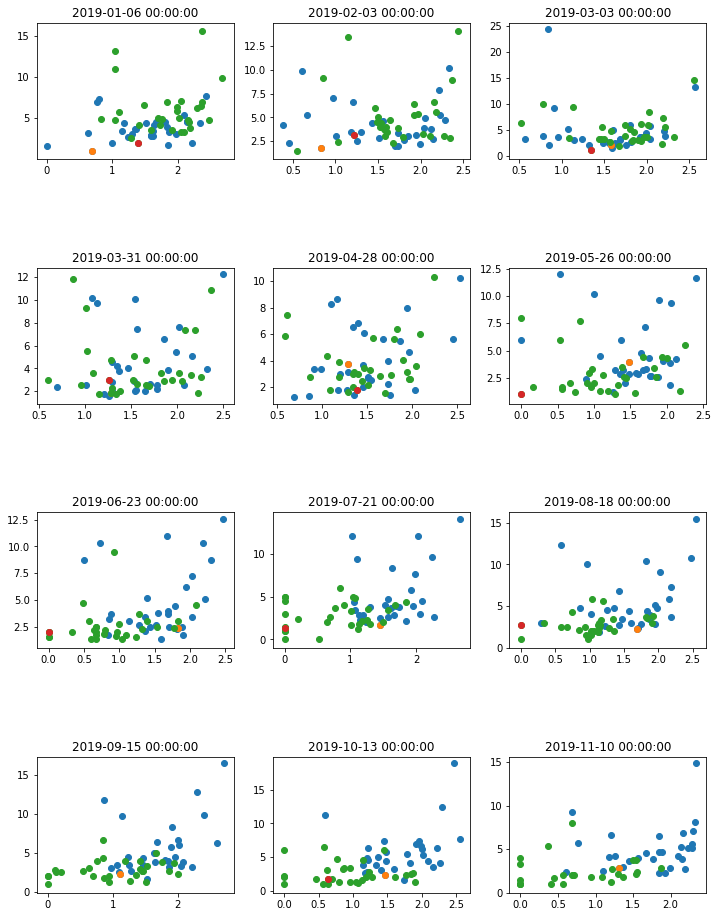

In [137]:
brk_array = np.array(brokerage_list)
ent_array = np.array(entropy_list)
pop_array =  np.array(pop_list)

f = plt.figure(figsize=(12,16))
f.subplots_adjust(hspace=0.8)

xaxis = week_slices[108::4]
corr_list = []
for i in range(1,13):
    ax = f.add_subplot(4,3,i)
    ax.scatter(ent_array[i-1,:], pop_array[i-1,:])
    ax.scatter(ent_array[i-1,24], pop_array[i-1,24])    
    ax.title.set_text(xaxis[i-1])

for i in range(13,25):
    ax = f.add_subplot(4,3,i-12)
    ax.scatter(ent_array[i-1,:], pop_array[i-1,:])
    ax.scatter(ent_array[i-1,24], pop_array[i-1,24])
    ax.title.set_text(xaxis[i-1])

In [138]:
# time_index = 22
# # for time_index in range(11):
# df = pd.DataFrame([brokerage_list[time_index], pop_list[time_index], entropy_list[time_index], homo_list[time_index]]).T
# df.columns = ['brokerage','popularity','entropy','homogeneity']
# #     print("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
# print(df.corr())
# g=sns.pairplot(df)
# g.fig.suptitle("index "+str(time_index)+ ". 4 weeks from:" + str(week_slices[156-52+4*time_index].strftime("%Y/%m/%d")))


In [139]:
corr_list = []
for time_index in range(len(brokerage_list)):
    print(time_index)
    df = pd.DataFrame([brokerage_list[time_index], pop_list[time_index], entropy_list[time_index], homo_list[time_index]]).T
    df.columns = ['brokerage','popularity','entropy','homogeneity']
    corr_list.append(np.array(df.corr()))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [140]:
corr_list = np.array(corr_list)

In [141]:
df.columns

Index(['brokerage', 'popularity', 'entropy', 'homogeneity'], dtype='object')

In [142]:
print(week_slices[0])
print(week_slices[108::4])

2016-01-10 00:00:00
DatetimeIndex(['2018-02-04', '2018-03-04', '2018-04-01', '2018-04-29',
               '2018-05-27', '2018-06-24', '2018-07-22', '2018-08-19',
               '2018-09-16', '2018-10-14', '2018-11-11', '2018-12-09',
               '2019-01-06', '2019-02-03', '2019-03-03', '2019-03-31',
               '2019-04-28', '2019-05-26', '2019-06-23', '2019-07-21',
               '2019-08-18', '2019-09-15', '2019-10-13', '2019-11-10'],
              dtype='datetime64[ns]', freq='4W-SUN')


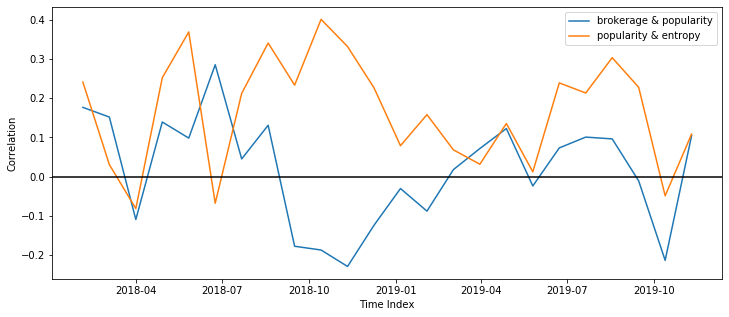

In [143]:
plt.figure(figsize=(12,5))
xaxis = week_slices[108::4]
plt.plot(xaxis, corr_list[:,0,1], label=(df.columns[0] +" & "+ df.columns[1])) # seasonality
# plt.plot(xaxis, corr_list[:,0,2], label=(df.columns[0] +" & "+ df.columns[2]))
# plt.plot(xaxis, corr_list[:,0,3], label=(df.columns[0] +" & "+ df.columns[3]))
plt.plot(xaxis, corr_list[:,1,2], label=(df.columns[1] +" & "+ df.columns[2])) # seasonality
# plt.plot(xaxis, corr_list[:,1,3], label=(df.columns[1] +" & "+ df.columns[3]))
# plt.plot(xaxis, corr_list[:,2,3], label=(df.columns[2] +" & "+ df.columns[3]))
plt.ylabel("Correlation")
plt.xlabel("Time Index")
plt.axhline(y=0, linestyle='-', color='black')
# plt.axvline(x=xaxis[-3], linestyle='--', color='red')
plt.legend()
plt.show()

In [144]:
print((df.columns[0] +" & "+ df.columns[1]), np.mean(corr_list[:,0,1]))
print((df.columns[0] +" & "+ df.columns[2]), np.mean(corr_list[:,0,2]))
print((df.columns[0] +" & "+ df.columns[3]), np.mean(corr_list[:,0,3]))
print((df.columns[1] +" & "+ df.columns[2]), np.mean(corr_list[:,1,2]))
print((df.columns[1] +" & "+ df.columns[3]), np.mean(corr_list[:,1,3]))
print((df.columns[2] +" & "+ df.columns[3]), np.mean(corr_list[:,2,3]))

brokerage & popularity 0.017326046754964016
brokerage & entropy 0.3106101926884228
brokerage & homogeneity -0.0359520604395711
popularity & entropy 0.1670973962956163
popularity & homogeneity 0.21179714491127644
entropy & homogeneity 0.052459807290706616


In [145]:
week_slices[156-52:-1:4]

DatetimeIndex(['2018-01-07', '2018-02-04', '2018-03-04', '2018-04-01',
               '2018-04-29', '2018-05-27', '2018-06-24', '2018-07-22',
               '2018-08-19', '2018-09-16', '2018-10-14', '2018-11-11',
               '2018-12-09', '2019-01-06', '2019-02-03', '2019-03-03',
               '2019-03-31', '2019-04-28', '2019-05-26', '2019-06-23',
               '2019-07-21', '2019-08-18', '2019-09-15', '2019-10-13'],
              dtype='datetime64[ns]', freq='4W-SUN')

In [146]:
['2019-01-06 ~ 2019-02-02', '2019-02-03 ~ 2019-03-02', '2019-03-03 ~ 2019-03-30', '2019-03-31 ~ 2019-04-27',
'2019-04-28 ~ 2019-05-25', '2019-05-26 ~ 2019-06-22', '2019-06-23 ~ 2019-07-20', '2019-07-21 ~ 2019-08-17',
'2019-08-18 ~ 2019-09-14', '2019-09-15 ~ 2019-10-12', '2019-10-13 ~ 2019-11-10']

['2019-01-06 ~ 2019-02-02',
 '2019-02-03 ~ 2019-03-02',
 '2019-03-03 ~ 2019-03-30',
 '2019-03-31 ~ 2019-04-27',
 '2019-04-28 ~ 2019-05-25',
 '2019-05-26 ~ 2019-06-22',
 '2019-06-23 ~ 2019-07-20',
 '2019-07-21 ~ 2019-08-17',
 '2019-08-18 ~ 2019-09-14',
 '2019-09-15 ~ 2019-10-12',
 '2019-10-13 ~ 2019-11-10']

In [147]:
homo_df = pd.DataFrame(homo_list)
homo_df.replace(to_replace=[None], value=np.nan, inplace=True)

In [148]:
np.nanmean(homo_df, axis=1)

array([1.69869592e+00, 2.39809972e+00, 2.03236738e+00, 1.69250923e+00,
       1.93456849e+00, 1.77953826e+00, 1.92472119e+00, 2.16755564e+00,
       1.99090146e+00, 2.14062855e+00, 2.21729583e+00, 2.14258394e+00,
       2.00371557e+00, 2.18347026e+00, 2.02738937e+00, 1.94095905e+00,
       1.74072682e+00, 1.79521452e+00, 2.22430028e+00, 3.28716273e+00,
       1.52927203e+00, 1.79814074e+00, 1.62427794e+00, 1.58021040e+14])

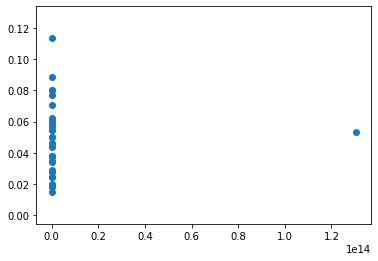

In [149]:
# plot mean homogeneity vs mean brokerage
homo_df = pd.DataFrame(homo_list)
homo_df.replace(to_replace=[None], value=np.nan, inplace=True)
mean_homo = np.nanmean(homo_df, axis=0)
mean_entropy = np.nanmean(entropy_list, axis=0)
mean_brokerage= np.mean(np.array(brokerage_list), axis=0)

plt.scatter(mean_homo, mean_brokerage)

In [150]:
week_slices[-20]

Timestamp('2019-06-30 00:00:00', freq='W-SUN')

In [151]:
xaxis[-3]
travel_tensors_raw[-3]

array([[0., 5., 0., ..., 0., 0., 0.],
       [5., 0., 1., ..., 0., 0., 0.],
       [2., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
print(xaxis[-20], xaxis[-19], xaxis[-18])

2018-05-27 00:00:00 2018-06-24 00:00:00 2018-07-22 00:00:00


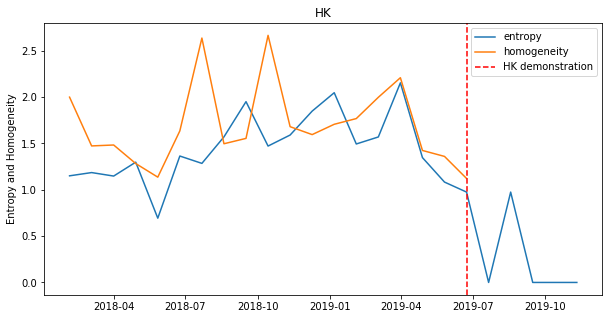

In [153]:
plt.figure(figsize=(10,5))
# plt.plot(xaxis, np.array(brokerage_list)[:,28], label="brokerage", alpha=0.5)
plt.plot(xaxis, np.array(entropy_list)[:,28], label="entropy")
plt.plot(xaxis, np.array(homo_list)[:,28], label="homogeneity")
# plt.plot(xaxis, np.array(pop_list)[:,28], label="popularity", alpha=0.2)
plt.axvline(x=xaxis[-6], linestyle='--', color='red', label="HK demonstration")
plt.ylabel("Entropy and Homogeneity")
plt.legend()
plt.title("HK")
plt.show()
# plt.plot(np.array(brokerage_list)[:,4])
# plt.plot(np.array(brokerage_list)[:,5])

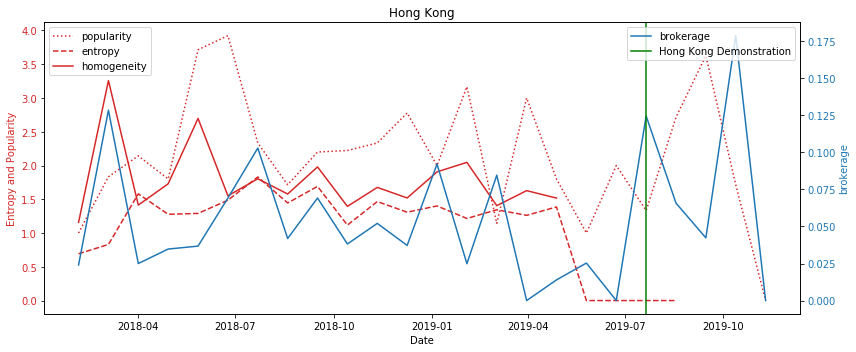

In [154]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

cntnum = 24

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,cntnum], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cntnum], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,cntnum], label="homogeneity", color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cntnum], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=xaxis[-5], linestyle='-', color='green', label="Hong Kong Demonstration")
plt.legend(loc=1)
plt.title("Hong Kong")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [155]:
xaxis[-21]

Timestamp('2018-04-29 00:00:00', freq='4W-SUN')

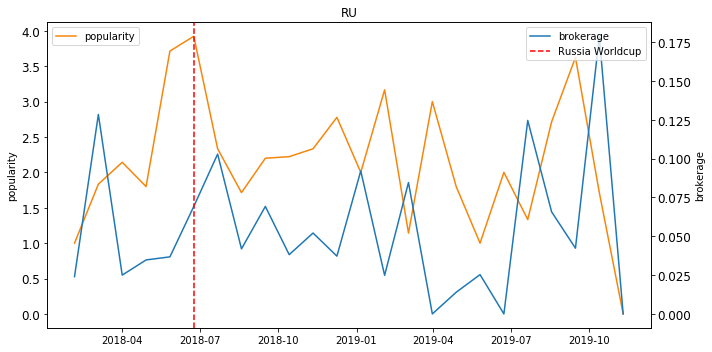

In [156]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(10,5))

cnt_num = 24

color = '#F7850A'
# ax1.set_xlabel('Date')
ax1.set_ylabel('popularity')
plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color)
# ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='-')
# ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color, )
ax1.tick_params(axis='y', labelsize=12)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage')  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y', labelsize=12)
plt.axvline(x=xaxis[-19], linestyle='--', color='red', label="Russia Worldcup")
plt.legend(loc=1)
plt.title(label_dict[cnt_num])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [157]:
np.array(homo_list)[:,cnt_num]

array([1.1573679234440835, 3.257629916551418, 1.41422159436045,
       1.7292399864419337, 2.697129338071988, 1.5510295956505609,
       1.8033271799896384, 1.5780037459999312, 1.97902476666334,
       1.3946550696290505, 1.675697974306065, 1.5195231470075488,
       1.9057206712390045, 2.0463020769757545, 1.405133842182539,
       1.6278649233678357, 1.51748645369121, None, None, None, None, None,
       1.2556136438209289, None], dtype=object)

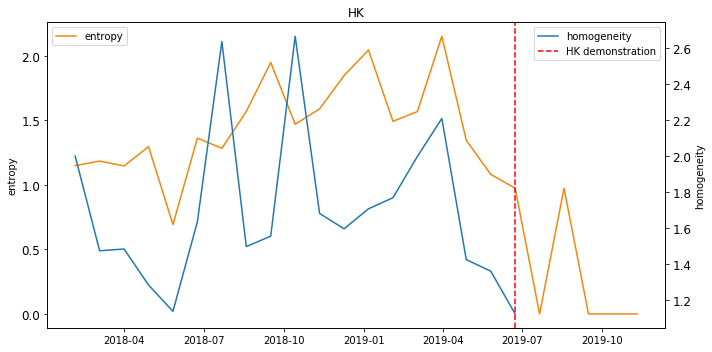

In [159]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(10,5))

cnt_num = 28

color = '#F7850A'
# ax1.set_xlabel('Date')
ax1.set_ylabel('entropy')
# plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color)
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='-')
# ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color)
ax1.tick_params(axis='y', labelsize=12)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('homogeneity')  # we already handled the x-label with ax1
# ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color)
ax2.tick_params(axis='y', labelsize=12)
plt.axvline(x=xaxis[-6], linestyle='--', color='red', label="HK demonstration")
plt.legend(loc=1)
plt.title(label_dict[cnt_num])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

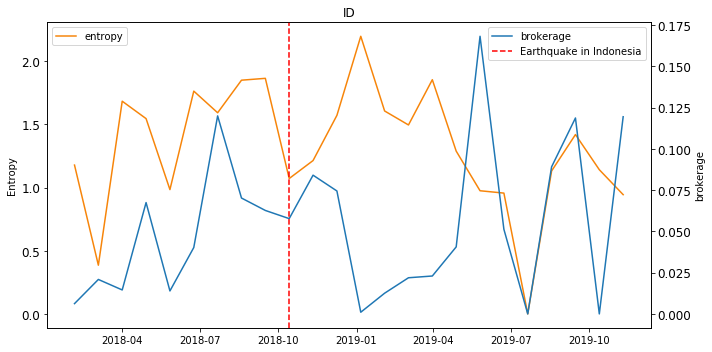

In [161]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(10,5))

cnt_num = 12

color = '#F7850A'
# ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy')
# plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='-')
# ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color, )
ax1.tick_params(axis='y', labelsize=12)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage')  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y', labelsize=12)
plt.axvline(x=xaxis[-15], linestyle='--', color='red', label="Earthquake in Indonesia")
plt.legend(loc=1)
plt.title(label_dict[cnt_num])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [60]:
def scale(array):
    array = [0 if (v is None) else v for v in array]
    array = [0 if (np.isnan(v)) else v for v in array]
    mx = np.max(array)
    mi = np.min(array)
    return (array-mi)/(mx-mi)*10

In [61]:
cnt_num=24
brokerage_scale = scale(np.array(brokerage_list)[:,cnt_num])
pop_scale = scale(np.array(pop_list)[:,cnt_num])
entropy_scale = scale(np.array(entropy_list)[:,cnt_num])
homo_scale = scale(np.array(homo_list)[:,cnt_num])


In [62]:
np.isnan(np.array(entropy_list)[:,cnt_num])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True])

In [63]:
total_array = brokerage_scale + pop_scale + entropy_scale + homo_scale
std_sociogeo = (total_array - np.mean(total_array))/np.std(total_array)

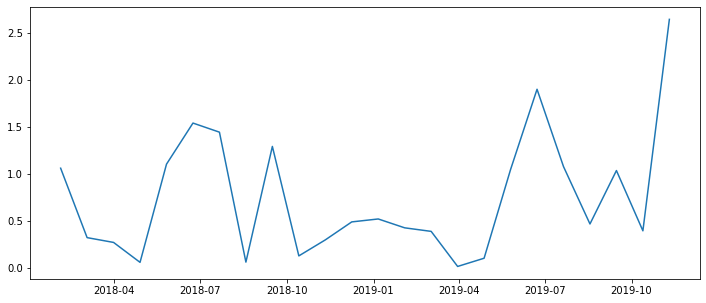

In [64]:
plt.figure(figsize=(12,5))
plt.plot(xaxis, np.abs(std_sociogeo))

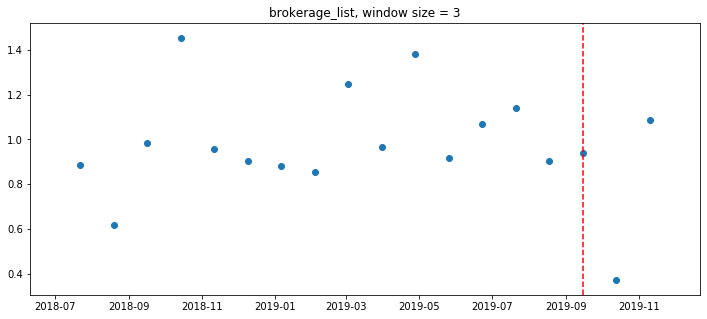

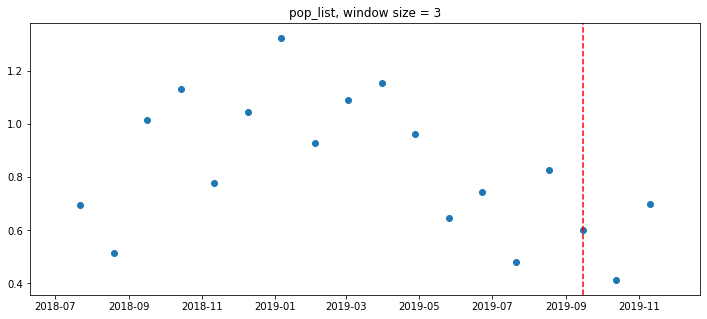

In [65]:
W = 3
# feat_arr = [out_d_ar, out_w_ar, in_d_ar, in_w_ar, neig_ar, recep_n_ar, tri_ar, avg_iw_ar, avg_ow_ar, max_iw_ar, max_ow_ar, max_wr_ar]
feat_arr = [brokerage_list, pop_list] # , entropy_list, homo_list
feat_title = ['brokerage_list', 'pop_list','entropy_list','homo_list']
z_collection = []
iter = 0
#############################################################################
# different pattern from LOF of TBAD
# more stationary. 
# in_d: reasoanble seasonality. star to incrase from July
#############################################################################
for feature in feat_arr:
    feat = feature # out_w_ar, recep_n_ar
    cov_series = []
    for t in range(W, len(feat)):
        C = np.cov(np.array(feat)[t-W:t].T)
        cov_series.append(C)

    u1_list = []
    for i in cov_series:
        U, S, V =np.linalg.svd(i)
        u1_list.append(U[:,0])

    z_list = []
    for i in range(W, len(u1_list)):
        utv = np.dot(u1_list[i], np.mean(np.array(u1_list[i-W:i]), axis=0))
        z = 1-1* utv
        z_list.append(z)
    #############################################################################

#     week_slices = pd.date_range('2016-01-04', periods=200, freq='W')
    plt.figure(figsize=(12,5))
    plt.scatter(xaxis[2*W:],z_list)
#     plt.plot(xaxis[W+int(W/2)*1:-int(W/2)],z_list)
#     plt.plot(range(-Time_interval+2*W + 40, -40), z_list[40:-40])
    plt.title(feat_title[iter]+ ", window size = " +str(W))
    plt.axvline(x=xaxis[-3], linestyle='--', color='red')
    iter +=1
    #############################################################################
    z_collection.append(np.array(z_list))

In [66]:
print(np.array(brokerage_list)[:,28])
print(np.array(entropy_list)[:,28])
print(np.array(pop_list)[:,28])
print(np.array(homo_list)[:,28])

[0.03059635 0.00639609 0.01389497 0.02102258 0.01496717 0.02238957
 0.00436701 0.02557236 0.04303935 0.00583747 0.01876309 0.05321814
 0.02542555 0.03183707 0.05170396 0.01216924 0.01124606 0.00819838
 0.08993477 0.         0.05510571 0.01706988 0.         0.        ]
[1.14967561 1.33344029 1.14707158 1.29679411 1.09861229 1.4431409
 1.28379883 1.56954538 2.123749   1.6728705  1.58954863 1.84746918
 2.12721614 1.4930219  1.56865963 2.15228808 1.34607608 1.08219553
 1.21488965 0.         0.97431475 0.         0.         0.        ]
[3.125      3.14285714 3.         1.875      1.25       2.83333333
 2.66666667 2.33333333 2.8        4.         3.         2.25
 3.3        4.6        2.33333333 3.42857143 3.         1.33333333
 1.66666667 1.         1.         1.         2.         1.        ]
[1.7460337727714592 1.3701800180729127 1.4591092226147713
 1.2410389267329394 1.3807603269780335 1.7676977512628587
 2.2875056017982525 1.475498024912258 1.666004233414444 2.2037802966766766
 1.632994

In [67]:
adj_list = []
interval = 50 # 26 * 4 weeks = 2 year,
for i in range(interval):
    ajm = np.mean(travel_tensors_raw[0 + 4*i:4 + 4*i][:,0:226,0:226], axis=0)
    adj_list.append(ajm)

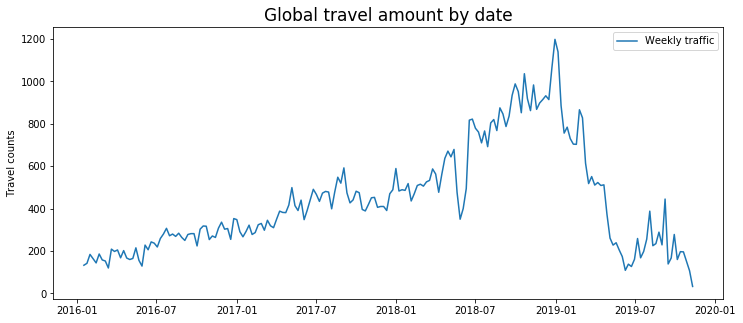

In [68]:
plt.figure(figsize=(12,5))
plt.plot(week_slices[1:], np.sum(np.sum(travel_tensors_raw[:,:226,:226],1),1), label = "Weekly traffic")
plt.ylabel("Travel counts")
plt.title("Global travel amount by date", fontsize=17)
plt.legend()

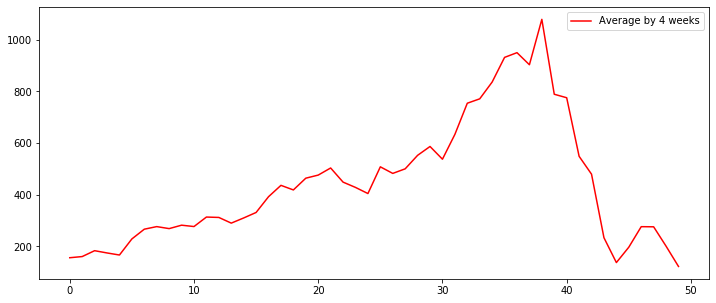

In [69]:
fourweek_tensor = np.array(adj_list)
plt.figure(figsize=(12,5))
plt.plot(np.sum(np.sum(fourweek_tensor,1),1), color='red', label = "Average by 4 weeks")
plt.legend()

RU


Text(0.5, 1.0, 'Travel amount by date')

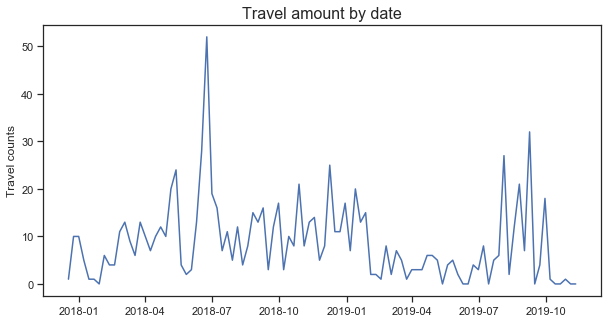

In [252]:
cntnum=24
# fourweek_tensor = np.array(adj_list)

outtraffic = np.sum(travel_tensors_raw[:,cntnum,:30], 1)
intraffic = np.sum(travel_tensors_raw[:,:30,cntnum], 1)
print(label_dict[cntnum])

plt.figure(figsize=(10,5))
plt.plot(week_slices[1:][-100:], (intraffic + outtraffic)[-100:])
plt.ylabel("Travel counts")
plt.title("Travel amount by date", size=16)

RU


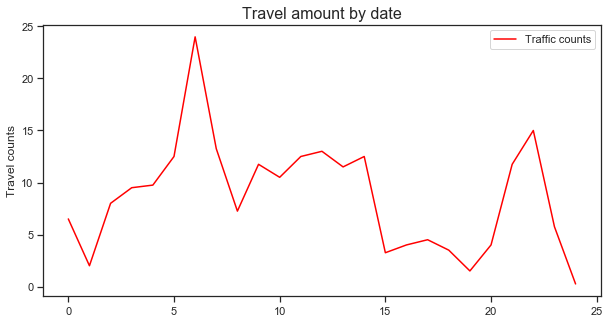

In [256]:
# fourweek_tensor = np.array(adj_list)

outtraffic = np.sum(fourweek_tensor[:,cntnum,:30], 1)
intraffic = np.sum(fourweek_tensor[:,:30,cntnum], 1)
print(label_dict[cntnum])

plt.figure(figsize=(10,5))
plt.plot((intraffic + outtraffic)[-25:], color='red', label ="Traffic counts")
# plt.plot(xaxis, (intraffic + outtraffic)[-24:], color='blue', label ="Google search trend")
plt.ylabel("Travel counts")
plt.title("Travel amount by date", size=16)
plt.legend()


In [72]:
np.sum(fourweek_tensor>0)/(50*30*30)

0.6232666666666666

In [73]:
fourweek_tensor.shape

(50, 226, 226)

In [74]:
np.sum(travel_tensors_raw[:,:30,:30]>0)/(200*30*30)

0.11366111111111112

In [75]:
tensor = travel_tensors_raw[:,:226,:226]

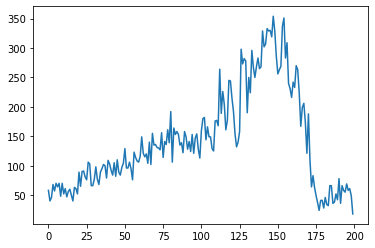

In [76]:
cntnum=0
intr = np.sum(tensor[:,:,cntnum],1)
outtr = np.sum(tensor[:,cntnum,:],1)
plt.plot(intr+outtr)

In [77]:
adj_list = []
interval = 50 # 26 * 4 weeks = 2 year,
for i in range(interval):
    ajm = np.mean(travel_tensors_raw[0 + 4*i:4 + 4*i][:,0:226,0:226], axis=0)
    adj_list.append(ajm)
adj_list = np.array(adj_list)

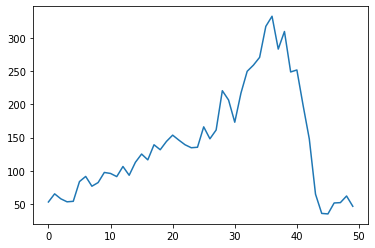

In [78]:
intr = np.sum(adj_list[:,:,cntnum],1)
outtr = np.sum(adj_list[:,cntnum,:],1)
plt.plot(intr+outtr)